QUESTION 1

In [22]:
# import pandas
import pandas as pd

# load in the data named "digitData2.csv" and store it in a variable called "data"
data = pd.read_csv("digitData2.csv")

In [23]:
# print the first 5 rows of the data to see what it looks like
data.head()

,0.000000000000000000e+00,0.000000000000000000e+00.1,5.000000000000000000e+00,1.300000000000000000e+01,9.000000000000000000e+00,1.000000000000000000e+00,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,...,0.000000000000000000e+00.23,0.000000000000000000e+00.24,0.000000000000000000e+00.25,6.000000000000000000e+00,1.300000000000000000e+01.2,1.000000000000000000e+01.2,0.000000000000000000e+00.26,0.000000000000000000e+00.27,0.000000000000000000e+00.28,0.000000000000000000e+00.29
0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
1,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
2,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
3,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
4,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5.0


In [24]:
# print how many rows and columns are in the data
data.shape

(1527, 65)

In [25]:
# the last column is the label, so we store it in a variable called "labels" and access it by position
labels = data.iloc[:, -1] # the -1 means the last column in the data frame

In [26]:
# the rest of the columns are the features, so we store them in a variable called "features"
features = data.iloc[:, :-1] # the :-1 means all columns except the last one in the data frame

QUESTION 2

The optimal k value is: 9


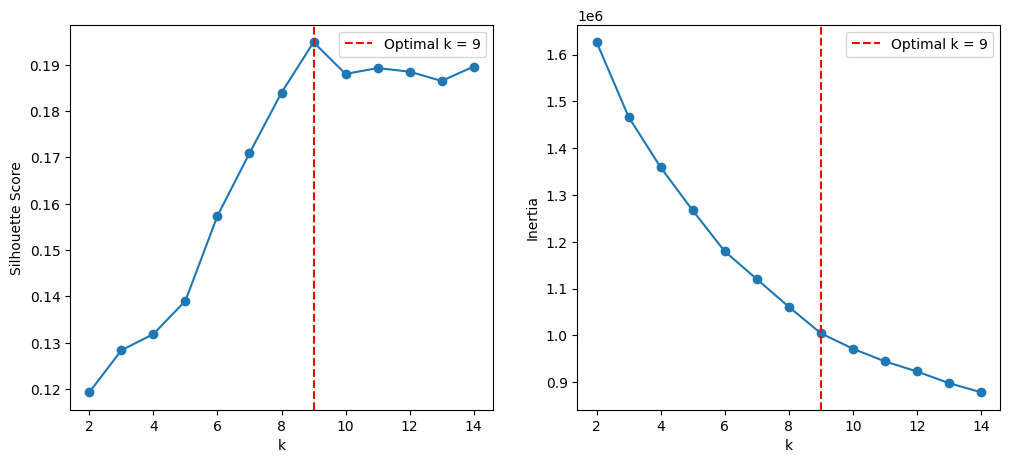

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# create a list of k values to test
k_values = list(range(2, 15))

# create a list to store the silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

# loop through the k values and calculate the silhouette score and inertia for each
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))
    inertia_values.append(kmeans.inertia_)

# Find the optimal k value
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal k value is: {optimal_k}")

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# plot the silhouette scores against the k values
ax1.plot(k_values, silhouette_scores, marker='o')
ax1.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
ax1.set_xlabel("k")
ax1.set_ylabel("Silhouette Score")
ax1.legend()

# plot the inertia values against the k values
ax2.plot(k_values, inertia_values, marker='o')
ax2.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
ax2.set_xlabel("k")
ax2.set_ylabel("Inertia")
ax2.legend()


# Show the plots
plt.show()


QUESTION 3

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import pandas as pd

def evaluate_clustering_algorithms(features, labels_list):
    evaluation_metrics = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
    evaluation_metric_names = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
    results = []

    for metric in evaluation_metrics:
        results.append([metric(features, labels) for labels in labels_list])

    results_df = pd.DataFrame(results, columns=["KMeans (random)", "KMeans++", "Agglomerative"], index=evaluation_metric_names)
    return results_df

# Perform clustering
kmeans_random = KMeans(n_clusters=optimal_k, init='random', random_state=0).fit(features)
kmeans_pp = KMeans(n_clusters=optimal_k, random_state=0).fit(features)
agg = AgglomerativeClustering(n_clusters=optimal_k, linkage="complete", affinity="cosine").fit(features)

# Evaluate clustering algorithms
labels_list = [kmeans_random.labels_, kmeans_pp.labels_, agg.labels_]
results_df = evaluate_clustering_algorithms(features, labels_list)

# Print the results in a table
print(results_df.to_markdown())


|                         |   KMeans (random) |   KMeans++ |   Agglomerative |
|:------------------------|------------------:|-----------:|----------------:|
| Silhouette Score        |          0.194911 |   0.194872 |        0.120921 |
| Calinski-Harabasz Score |        156.824    | 156.82     |      104.449    |
| Davies-Bouldin Score    |          1.72204  |   1.7231   |        2.17803  |


Review of the results:
When evaluating the performance of the clustering algorithms using the Silhouette Score, we can see that both KMeans with random initialization and KMeans++ have similar scores (0.1949 and 0.1948, respectively), which are higher than the score for Agglomerative Clustering (0.1209). As the Silhouette Score ranges from -1 to 1, with higher values indicating better clustering, we can conclude that the KMeans algorithms perform better according to this metric.

In the case of the Calinski-Harabasz Score, which measures the ratio of the between-cluster dispersion to the within-cluster dispersion, higher values indicate dense and well-separated clusters. KMeans with random initialization and KMeans++ have nearly identical scores (156.824 and 156.82), both of which are higher than the score for Agglomerative Clustering (104.449).

As for the Davies-Bouldin Score, lower values indicate that clusters are more separated and less dispersed. This score measures the average similarity of each cluster with its most similar cluster, taking into account the ratio of within-cluster distances to between-cluster distances. In our case, KMeans with random initialization has the lowest score (1.722), followed by KMeans++ (1.7231) and Agglomerative Clustering (2.1780).

Question 4

FIXED UP PART FOR QUESTION 4 (Instructions by tutor: Repeat clustering using Kmeans for 50 times means use for loop 50 times and store the score and end of for loop print average value of the score and plot the graph)

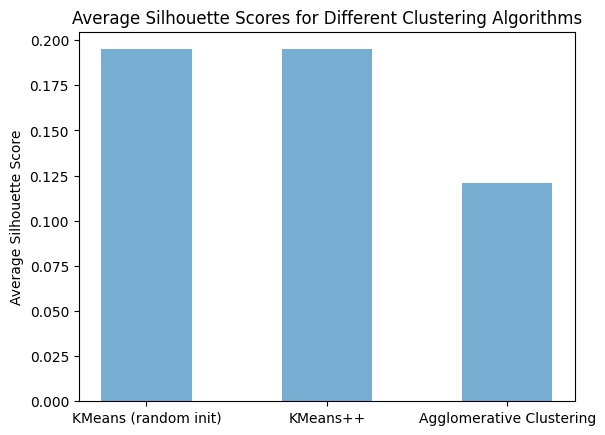

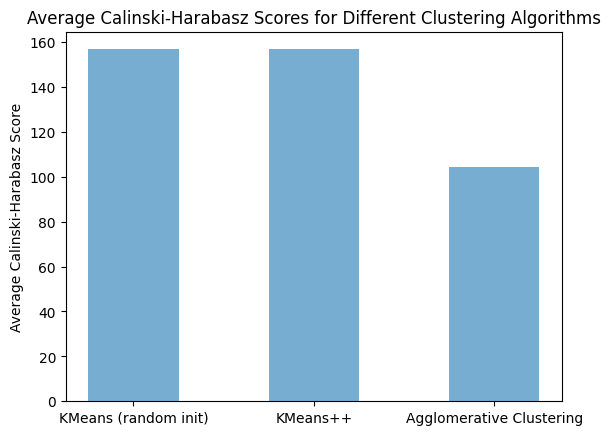

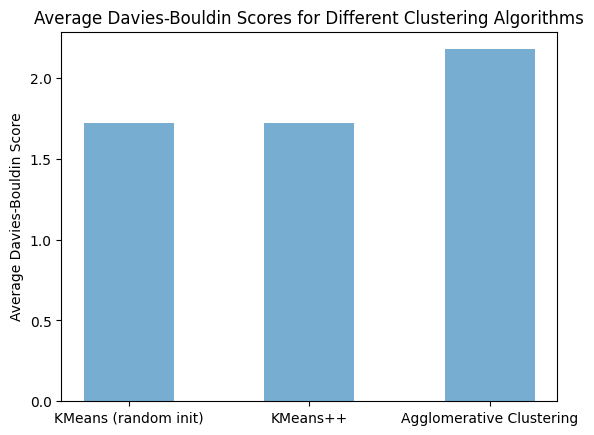

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize arrays to store scores
kmeans_random_scores = np.zeros((50, 3))
kmeans_pp_scores = np.zeros((50, 3))
agg_scores = np.zeros((50, 3))

# Repeat clustering using Kmeans for 50 times and store the scores
for i in range(50):
    kmeans_random = KMeans(n_clusters=optimal_k, init='random', random_state=i).fit(features)
    kmeans_pp = KMeans(n_clusters=optimal_k, random_state=i).fit(features)
    agg = AgglomerativeClustering(n_clusters=optimal_k, linkage="complete", affinity="cosine").fit(features)

    labels_list = [kmeans_random.labels_, kmeans_pp.labels_, agg.labels_]
    results_df = evaluate_clustering_algorithms(features, labels_list)

    # Store the scores
    kmeans_random_scores[i] = results_df.iloc[:, 0].values
    kmeans_pp_scores[i] = results_df.iloc[:, 1].values
    agg_scores[i] = results_df.iloc[:, 2].values

# Calculate the average scores
kmeans_random_avg = np.mean(kmeans_random_scores, axis=0)
kmeans_pp_avg = np.mean(kmeans_pp_scores, axis=0)
agg_avg = np.mean(agg_scores, axis=0)

# Function to plot the average scores
def plot_average_scores(metric_name, metric_index):
    fig, ax = plt.subplots()
    x = np.arange(3)
    width = 0.5
    average_scores = [kmeans_random_avg[metric_index], kmeans_pp_avg[metric_index], agg_avg[metric_index]]

    ax.bar(x, average_scores, width, alpha=0.6)

    ax.set_ylabel(f'Average {metric_name} Score')
    ax.set_title(f'Average {metric_name} Scores for Different Clustering Algorithms')
    ax.set_xticks(x)
    ax.set_xticklabels(['KMeans (random init)', 'KMeans++', 'Agglomerative Clustering'])

    plt.show()

# Plot the average silhouette scores
plot_average_scores("Silhouette", 0)

# Plot the average Calinski-Harabasz scores
plot_average_scores("Calinski-Harabasz", 1)

# Plot the average Davies-Bouldin scores
plot_average_scores("Davies-Bouldin", 2)



In [32]:
import pandas as pd

# Create a DataFrame to display the average scores
avg_scores_df = pd.DataFrame(data=np.vstack([kmeans_random_avg, kmeans_pp_avg, agg_avg]),
                             columns=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'],
                             index=['KMeans (random init)', 'KMeans++', 'Agglomerative Clustering'])

# Print the average scores in a table format
print("Average scores for each clustering algorithm:")
print(avg_scores_df.to_markdown())


Average scores for each clustering algorithm:
|                          |   Silhouette |   Calinski-Harabasz |   Davies-Bouldin |
|:-------------------------|-------------:|--------------------:|-----------------:|
| KMeans (random init)     |     0.194907 |             156.82  |          1.71986 |
| KMeans++                 |     0.194903 |             156.821 |          1.71985 |
| Agglomerative Clustering |     0.120921 |             104.449 |          2.17803 |


# To summarise the results above we can see that the average scores for KMeans++ and KMeans (random init) are very similar, and both are higher than the average score for Agglomerative Clustering. This is consistent with the results from Question 3, where we evaluated the clustering algorithms using the Silhouette Score, Calinski-Harabasz Score and Davies-Bouldin Score. In this case, we can conclude that KMeans++ and KMeans (random init) perform better than Agglomerative Clustering for this dataset based on the three evaluation metrics. However, the difference between the average scores for KMeans++ and KMeans (random init) is very small, so we cannot conclude that one of these algorithms is significantly better than the other.